In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Paso 1: Cargar los datos y realizar el EDA

In [2]:
data = pd.read_csv("student.csv")

In [3]:
print("Primeras filas del DataFrame:")
data.head()

Primeras filas del DataFrame:


,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [4]:
if 'Id' in data.columns:
    data = data.drop('Id', axis=1)
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)


In [5]:
data.head()

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


# EDA

In [6]:
print("\nInformación del DataFrame:")
data.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_Age         145 non-null    int64 
 1   Sex                 145 non-null    object
 2   High_School_Type    145 non-null    object
 3   Scholarship         144 non-null    object
 4   Additional_Work     145 non-null    object
 5   Sports_activity     145 non-null    object
 6   Transportation      145 non-null    object
 7   Weekly_Study_Hours  145 non-null    int64 
 8   Attendance          145 non-null    object
 9   Reading             145 non-null    object
 10  Notes               145 non-null    object
 11  Listening_in_Class  145 non-null    object
 12  Project_work        145 non-null    object
 13  Grade               145 non-null    object
dtypes: int64(2), object(12)
memory usage: 16.0+ KB


In [7]:
# Estadísticas descriptivas de las características numéricas
print("\nEstadísticas descriptivas de las características numéricas:")
data.describe()


Estadísticas descriptivas de las características numéricas:


,Student_Age,Weekly_Study_Hours
count,145.000000,145.000000
mean,19.682759,2.331034
std,1.992010,4.249273
min,18.000000,0.000000
25%,18.000000,0.000000
50%,19.000000,0.000000
75%,21.000000,2.000000
max,26.000000,12.000000


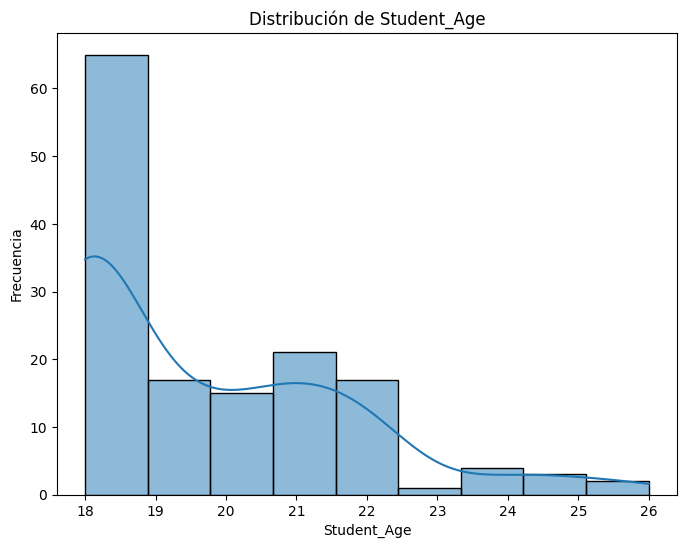

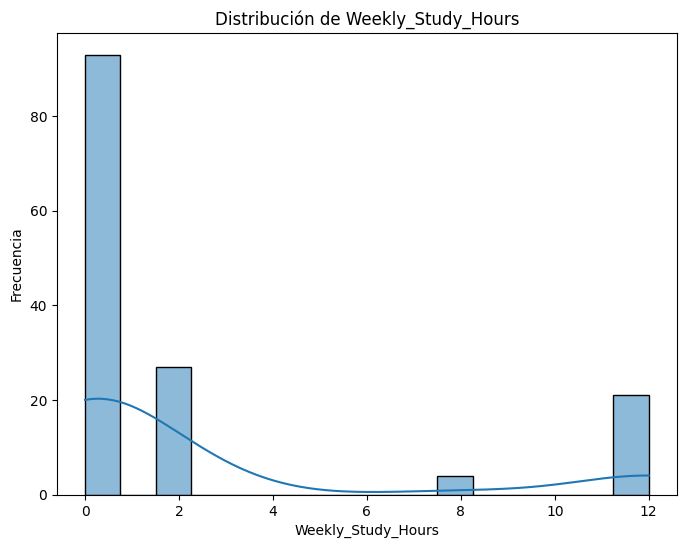

In [8]:
# Visualización de la distribución de las características numéricas
numeric_columns = data.select_dtypes(include=['int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [9]:
# Visualización de la relación entre las características numéricas y la variable objetivo
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre características numéricas')
plt.show()

ValueError: could not convert string to float: 'Male'

<Figure size 1000x800 with 0 Axes>

# Convertir columnas categóricas a variables numéricas

In [10]:
# Codificación binaria para Sexo (Sex)
data['Sex'] = data['Sex'].replace({'Male': 0, 'Female': 1})

# Codificación one-hot para Tipo de Escuela Secundaria (High_School_Type)
data = pd.get_dummies(data, columns=['High_School_Type'])

# Convertir porcentajes en la columna 'Scholarship' a valores numéricos
data['Scholarship'] = data['Scholarship'].str.rstrip('%').astype(float) / 100.0

# Codificación binaria para Trabajo Adicional (Additional_Work), Actividad Deportiva (Sports_activity), Trabajo de Proyecto (Project_work), Escuchar en Clase (Listening_in_Class), Notas (Notes), Lectura (Reading)
binary_columns = ['Additional_Work', 'Sports_activity', 'Project_work', 'Listening_in_Class', 'Notes', 'Reading']
data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0})

# Codificación ordinal para Asistencia (Attendance)
data['Attendance'] = data['Attendance'].map({'Never': 0, 'Sometimes': 1, 'Always': 2})

C:\Users\HP\AppData\Local\Temp\ipykernel_12140\4123113213.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'Male': 0, 'Female': 1})
C:\Users\HP\AppData\Local\Temp\ipykernel_12140\4123113213.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0})


In [13]:
# Eliminar filas con valores faltantes
data = data.dropna()

# Dividir los datos en conjunto de entrenamiento y prueba

In [11]:
X = data.drop('Grade', axis=1)
y = data['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = CategoricalNB()
model.fit(X_train, y_train)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer